# STAT 305 - Handout 5
# Introduction to Symbulate

Symbulate is a Python package which provides a user friendly framework for conducting simulations involving probability models. The syntax of Symbulate mirrors the "language of probability" in that the primary objects in
Symbulate are the same as the primary components of a probability model: probability spaces, random variables, events.  Once these components are specified, Symbulate allows users to simulate many times from the 
probability model and summarize those results.

Conducting and analyzing simulations in Symbulate requires minimal programming. Symbulate
eliminates the need for: writing loops to perform repetitions of a simulation, initializing and
updating variables to store results, "vectorizing" code, and learning commands or packages to
produce graphics. In addition, there is no need to install additional packages or libraries.

The Symbulate package can be freely downloaded from the [Symbulate Github repository](\href{https://github.com/dlsun/symbulate}). This section contains a brief introduction to Symbulate; many more examples will be introduced throughout the course.  More examples can be also found in the [Symbulate documentation](https://dlsun.github.io/symbulate/index.html).

In [14]:
4/2

2.0

In [13]:
3 + 2

5

 The following command imports Symbulate during a Python session.  (The second line is an "IPython magic" which enables inline plotting.)

In [1]:
from symbulate import *
%matplotlib inline

## Probability spaces

We introduce some of the core Symbulate commands with a simple example.  Roll a fair four-sided die twice and let $X$ be the sum of two rolls and $Y$ be the larger of the two rolls (or the common value if a tie).  The following Symbulate code defines a probability space `P` for simulating the 16 equally likely ordered pairs of rolls via a `BoxModel`.

In [2]:
P = BoxModel([1, 2, 3, 4], size=2, replace=True, order_matters=True)

(Technical note on notation: a probability space is a triple $(\Omega, \mathcal{F}, P)$, while $P$ is just the probability measure. We primarily view a Symbulate probability space as a description of the probability model rather than an explicit specification of $\Omega$.  For example, we define a `BoxModel` instead of creating a set with all possible outcomes.  We tend to represent a probability space with `P`, even though this is a slight abuse of notation.)

An outcome of `P` consists of a draw of 2 tickets in sequence, with replacement, from a box with tickets labeled 
1, 2, 3, and 4. Each simulated outcome consists of an ordered pair of rolls.  The `sim` command simulates realizations of probability space outcomes (or events or random variables). 

In [3]:
P.sim(4)

0,"(4, 3)"
1,"(4, 1)"
2,"(4, 3)"
3,"(1, 1)"


(Technical note: Python follows zero-based indexing; the first item in a list is 0, the second item is 1, etc.)

Symbulate objects have methods such as `sim`, `tabulate`, which can be "chained" together with periods `.`; in this way a line of code can be loosely read left to right as a sentence.  In the following, `P.sim(10000).tabulate()` can read like "For the probability space `P`, simulate 10000 outcomes and tabulate them".

In [4]:
P.sim(16000).tabulate()

"(2, 3)",990
"(4, 4)",1005
"(3, 3)",978
"(3, 1)",1009
"(1, 1)",1073
"(1, 3)",1044
"(2, 4)",993
"(4, 3)",982
"(4, 2)",1011
"(1, 4)",996
"(2, 2)",990


## Random variables

Recall that a random variable is a function mapping outcomes in the sample space to real numbers.  A Symbulate `RV` is specified by the probability space on which it is defined and the mapping function.

In [5]:
X = RV(P, sum)
Y = RV(P, max)

The above code simply defines the random variables.  Since a random variable $X$ is a function, any `RV` can be called as a function to return its value $X(\omega)$ for a particular outcome $\omega$ in the probability space.

In [6]:
omega = (3, 2)  # a pair of rolls
X(omega), Y(omega)

(5, 3)

The following commands simulate 10,000 values of the random variable `Y`, store the results as `y`, and summarize the realized values and their relative frequencies, in a plot and table.  (The default option `normalize=False` returns frequencies (counts).)  Note that the random variable itself is denoted with an uppercase letter `Y`, while the realized values of it are denoted with a lowercase letter `y`.

1,0.0629
2,0.1843
3,0.3119
4,0.4409
Total,1.0


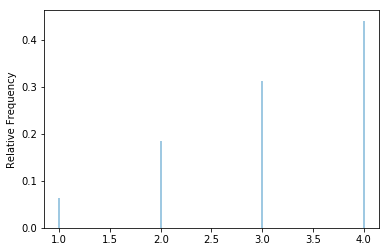

In [7]:
y = Y.sim(10000)
y.plot()
y.tabulate(normalize=True)

## Events

Events can be defined and simulated.  For programming reasons, events are enclosed in parentheses `()` rather than braces $\{\}$.  A realization of an event is `True` if the event occurs for the simulated outcome ($\omega \in A$),  or `False` if not ($\omega \notin A$).

In [8]:
A = (X <= 3) # an event
A.sim(10000).tabulate()

False,8077
True,1923
Total,10000


## Summary of Symbulate commands

Many
scenarios require only a few lines of Symbulate code to set up, run,
analyze, and visualize. The following table comprises the
requisite Symbulate commands for a wide variety of situations.

  
  | Command                    | Function
  | -------------------------- | -----------------------------------------------------------------------------------------
  | `ProbabilitySpace`         | Define a probability space (e.g. `BoxModel`))
  | `RV`                       | Define random variables or random vectors
  | `apply`                    | Apply transformations
  | `[]` (brackets)            | Access a component of a random vector, or a random process at a particular time
  | `*` (and `**`)             | Define independent probability spaces or distributions
  | `AssumeIndependent`        | Assume random variables or processes are independent
  | &#124; (vertical bar)      | Condition on events
  | `&`                        | Simulate multiple random variables (e.g. `(X & Y).sim(10000)`)
  | `sim`                      | Simulate outcomes, events, random variables, and random processes
  | `tabulate`                 | Tabulate simulated values
  | `plot`                     | Plot simulated values
  | `filter` (and relatives)   | Create subsets of simulated values (`filter_eq`, `filter_lt`, etc)
  | `count` (and relatives)    | Count simulated values which satisfy some critera (`count_eq`, `count_lt`, etc)
  | Statistical summaries      | `mean`, `median`, `sd`, `var`, `quantile`, `corr`, `cov`, etc.
  | Common models              | `Binomial`, `Normal`, etc; encountered throughout the course

While no previous experience with Python is required, it is also possible to incorporate Python programming with Symbulate code. In particular, Python functions or loops can be used: to define or transform random variables or stochastic processes, or to investigate the effects of changing parameter values.  Also, while many common plots are built in with the Symbulate `plot` function, the [Matplotlib package](https://matplotlib.org/) can be used to create or customize plots.

## Matching problem

The `RV`s in the dice rolling example involved the common functions `sum` and `max`.  User-defined functions can also be used to define a Symbulate `RV`.  We will use the matching problem to illustrate the use of a user-defined function, and to compare Symbulate with a "simulation-from-scratch" like in the R example.

**Exercise.** Imagine there is a `number_of_matches` function, just like there is a `sum` function.  For the matching problem when $n=4$ write the Symbulate code needed to:
- Define a probability space
- Define the RV $Y$
- simulate many values of $Y$
- summarize the simulated values in a plot and a table

(We'll continue to label the prizes as 1, ..., n, though it would be more natural in Python as 0, ..., n-1)

**Write your code before proceeding.**

```
n = 4
labels = list(range(1, n+1)) # Python syntax for [1, 2, ..., n]
P = BoxModel(labels, size=n, replace=False, order_matters=True)
Y = RV(P, number_of_matches)
y = Y.sim(10000)
y.plot()
y.tabulate()
```

So coding primarily involves writing the `number_of_matches` function, which defines the RV $Y$.  The following function takes as an input an outcome $\omega$ and defines the number of matches as a counter which goes through each box and adds 1 each time a match is encountered.

In [9]:
n = 4
labels = list(range(1, n+1)) # Python syntax for [1, 2, ..., n]

def number_of_matches(omega):
    count = 0
    for i in range(0, n, 1):
        if omega[i] == labels[i]:
            count += 1
    return count

Here is the function evaluated for a few sample outcomes

In [10]:
number_of_matches((1, 2, 3, 4)), number_of_matches((4, 3, 2, 1)), number_of_matches((1, 2, 4, 3)), number_of_matches((1, 3, 4, 2))

(4, 0, 2, 1)

Now we can put our user-defined function together with the Symbulate code to obtain the simulation for $n=4$.

0,3751
1,3278
2,2565
4,406
Total,10000


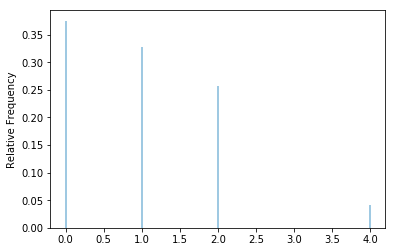

In [11]:
n = 4
labels = list(range(1, n+1)) # Python syntax for [1, 2, ..., n]

def number_of_matches(omega):
    count = 0
    for i in range(0, n, 1):
        if omega[i] == labels[i]:
            count += 1
    return count

P = BoxModel(labels, size=n, replace=False, order_matters=True)
Y = RV(P, number_of_matches)
y = Y.sim(10000)
y.plot()
y.tabulate()

## Jupyter widgets

Jupyter widgets can be used to create user interface controls (e.g. sliders, dropdown boxes) for interactively exploring how output responds to changes in parameters.

We can adapt the code for n=4 into a function `matching_sim` which takes $n$ as an input and outputs the plot of the simulated values of $Y$.  Then we can add a few lines of code to define a Jupyter widget with a slider for $n$ to interact with the plot.  (We also add a few `plt` lines to fix the axes so that they don't change as $n$ changes for easier comparison.)

In [12]:
import matplotlib.pyplot as plt
from ipywidgets import interact
import ipywidgets

def matching_sim(n):
    labels = list(range(1, n+1)) # Python syntax for [1, 2, ..., n]
    def number_of_matches(omega):
        count = 0
        for i in range(0, n, 1):
            if omega[i] == labels[i]:
                count += 1
        return count
    
    P = BoxModel(labels, size=n, replace=False, order_matters=True)
    Y = RV(P, number_of_matches)
    y = Y.sim(10000)
    y.plot()
    plt.ylim(0, 0.4)
    plt.xlim(-1, 10.2)
    plt.show()

interact(matching_sim, n=ipywidgets.IntSlider(min=4, max=50, step=1, value=1));

Widget Javascript not detected.  It may not be installed or enabled properly.
